# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [25]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [26]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [27]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [29]:
# Days tranfer to years ＆ observe describe()
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [30]:
# Make equal width 5
app_train['equal_width_YEARS_BIRTH'] = pd.cut(app_train['YEARS_BIRTH'], 5)
app_train['equal_width_YEARS_BIRTH'].value_counts().sort_index()

(20.469, 30.238]    46806
(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(59.4, 69.121]      39662
Name: equal_width_YEARS_BIRTH, dtype: int64

In [31]:
# Scratch out df['TARGET','equal_width_YEARS_BIRTH','YEARS_BIRTH'] without null
cols = ['TARGET','equal_width_YEARS_BIRTH','YEARS_BIRTH']
df = app_train.loc[app_train['TARGET'].notnull() & app_train['equal_width_YEARS_BIRTH'].notnull()& \
                   app_train['YEARS_BIRTH'].notnull(),cols]
df

,TARGET,equal_width_YEARS_BIRTH,YEARS_BIRTH
0,1,"(20.469, 30.238]",25.920548
1,0,"(39.959, 49.679]",45.931507
2,0,"(49.679, 59.4]",52.180822
3,0,"(49.679, 59.4]",52.068493
4,0,"(49.679, 59.4]",54.608219
...,...,...,...
307506,0,"(20.469, 30.238]",25.553425
307507,0,"(49.679, 59.4]",56.917808
307508,0,"(39.959, 49.679]",41.002740
307509,1,"(30.238, 39.959]",32.769863


In [32]:
#(Option) groupby() &mean()
df_groupby = df.groupby('equal_width_YEARS_BIRTH').mean()
df_groupby

,TARGET,YEARS_BIRTH
equal_width_YEARS_BIRTH,,
"(20.469, 30.238]",0.114494,26.755446
"(30.238, 39.959]",0.095426,35.214270
"(39.959, 49.679]",0.076894,44.583767
"(49.679, 59.4]",0.062000,54.513130
"(59.4, 69.121]",0.049644,62.980042


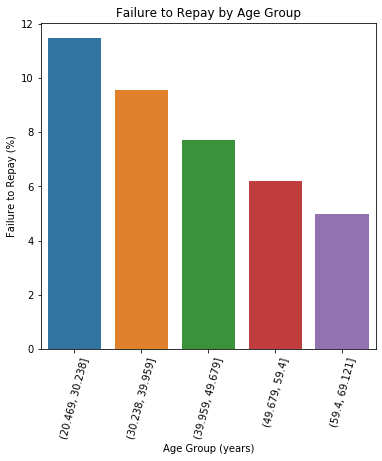

In [34]:
# plot繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
plt.figure(figsize = (6, 6))
px = df_groupby.index.astype(str)
py = 100 * df_groupby['TARGET']
sns.barplot(px, py)
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

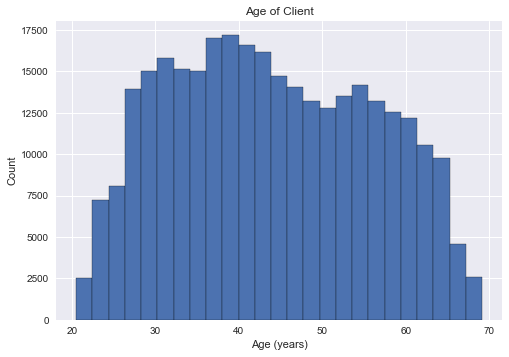

In [39]:
# this cell is nothing, I just wanna try something
plt.style.use('seaborn')

plt.hist(app_train['YEARS_BIRTH'] , edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()
